# Fake News Detection

## Objective:
In this notebook, we will classify fake news on the basis of several factors. Each factor will be trained against the separately related dataset. Later these trained models will be used to predict against master dataset and added as a column in order to predict fakeness.<br>

High level a polynomial equation to predict is <br>

**y = a1(number of words) + a2(Domain Rank) + a3(Political Affiliation) + a4(Toxicity Detection) + a5(Spam Detection) +a6(Stance Detection) + a7(Click Wait) + a8(News Category Determination)**

<br>
DataDource: <br>
https://www.kaggle.com/mrisdal/fake-news<br>

* uuidUnique identifier
* ord_in_thread
* authorauthor of story
* publisheddate published
* titletitle of the story
* texttext of story
* languagedata from webhose.io
* crawleddate the story was archived
* site_urlsite URL from BS detector
* countrydata from webhose.io
* domain_rankdata from webhose.io
* thread_title
* spam_scoredata from webhose.io
* main_img_urlimage from story
* replies_countnumber of replies
* participants_countnumber of participants
* likesnumber of Facebook likes
* commentsnumber of Facebook comments
* sharesnumber of Facebook shares
* typetype of website (label from BS detector)

<br>
https://www.kaggle.com/jruvika/fake-news-detection

## Team Responsibilities

*   Gyanesh Pandey - 012506936 :  Stance Detection, Spam Detection
*   Manoj Kumar - 012494989 : Toxicity Detection, News Category Determination, Domain Rank
*   Shalini Narang - 012507573 : Click Wait, Domain Rank
*   Yamini Muralidharen - 012449632 : Political Affiliation, Domain Rank

Everyone participated in Data Preprocessing and fake news detection master file.


## Project Journey

‘Fake News’ is one of the most debated topics in the context of current political discourse across the world. In the 2016 presidential election in US, the impact of misleading ‘News’ like articles received a substantial attention, particularly after the election of President Trump. According to a Pew Research poll*, 64% of adults in US say that fake news has left them confused about basic facts. Given the ubiquity of internet and ease of disseminating unverified information on internet, it is imperative that we need to develop tools and methods to indicate the veracity of a piece of information.

We, the team Sigmoid felt that it is our social responsibility to make use of our knowledge and build a system using machine learning, that could help decide if the news is fake or not. 

#### We started with Fake News data set provided by Kaggle.com. During our initial analysis we realized that the data set had a very limited set of features. We also felt that the dataset can be further enriched by adding domain ranking and spam detection features to identify whether the news is fake or not. Data was only having fake news so we balance it by adding real news from from different data source. 

### Data Preprocessing: 
Data set was not even readable format so performed tons of data preprocession(cleansing, formatting, selection, transformation etc.)
1. Replaced null
2. Special character handling
3. Structuring news content
4. Transformed Real News data from file level to original fake news format.
5. Encoding

### Data Enrichment:
1. Downloaded real news data(https://webhose.io/datasets/) and formatted to align to merge in Kaggle fake news data. Also scrapped from google news.
  - Python code: https://github.com/manojknit/MachineLearningModels/blob/master/DataEnrich/Webhose_RealNews_DataPull.py
  - Output file: https://github.com/manojknit/MachineLearningModels/blob/master/dataset/fake_real_dataset.csv
2. Used Alexa API to get domain ranking data.
  - Python code: https://github.com/manojknit/MachineLearningModels/blob/master/Regression/fetch_domain_rank.py
  - Output file: https://github.com/manojknit/MachineLearningModels/blob/master/dataset/fake_real_dataset.csv
3. Added column by running spam detection madel. 
  - Python code: https://github.com/manojknit/MachineLearningModels/blob/master/DataEnrich/Spam_Score.py
  - Output Data set : https://github.com/manojknit/MachineLearningModels/blob/master/dataset/fake_real_dataset_spam.csv
 
### Latent Manifold:
 After data enrichment we found latent variables like domain rank, spam score. We fount Domain Rank as Latent Manifold.
 
Following diagram depicts the data enrichment process for fake news.

![Fake news data enrichment ](https://s3-us-west-2.amazonaws.com/themodestwhite.com/ml_fn.jpg)

Once the dataset was sufficiently enriched, we tried executing a couple of machine learning algorithms on our dataset. We encountered following issues:
1. Any sophisticated approach to identify fake news uses **"NLP"** techniques. We as a team didn't have much knowledge on NLP at the time so we put this on hold.
2. Also, the data didn't have many numerical columns that could be used for many classification algorithms. We were not familiar with **"Vectorization"** techniques which could use a piece of text transformed into a **"bag-of-words"**.

We learn't that we need more time and expertise to handle this problem statement. Hence we decided to put Fake News on hold and work on another related problem, that can better justify covered models in class **"The impact of social network ads."**. We tried sever models like linear regression and clustering but we did not see expected results however classification worked quite well and we were able to predict fake or not for dataset.

### Conclusion:
...

In the following sections we will  discuss the project in detail.

In [0]:
# ignoring warnings to remove clutter 
import warnings
warnings.filterwarnings('ignore')

In [0]:
import os
import json
import string
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

!pip install gensim
!pip install lightgbm

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  # stop words are, is, the etc. which are not needed for model
from nltk.stem.porter import PorterStemmer
from gensim.models import word2vec
from sklearn.manifold import TSNE

%matplotlib inline

from plotly import tools  # to install $ pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier 
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb # to install $ pip install lightgbm
from PIL import Image

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
!rm *.*
!ls

sample_data


In [0]:
# only for google colab
#from google.colab import files
#uploaded = files.upload()

In [0]:
!wget https://raw.githubusercontent.com/manojknit/MachineLearningModels/master/dataset/fake_real_dataset_spam_category_clickbait_toxicity_politafln.csv?token=Ad6LbiYFGHHwnlsdHJp5y-e60Kghw7v9ks5b_eAJwA%3D%3D

--2018-11-21 00:50:13--  https://raw.githubusercontent.com/manojknit/MachineLearningModels/master/dataset/fake_real_dataset_spam_category_clickbait_toxicity_politafln.csv?token=Ad6LbiYFGHHwnlsdHJp5y-e60Kghw7v9ks5b_eAJwA%3D%3D
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13392123 (13M) [text/plain]
Saving to: ‘fake_real_dataset_spam_category_clickbait_toxicity_politafln.csv?token=Ad6LbiYFGHHwnlsdHJp5y-e60Kghw7v9ks5b_eAJwA==’

fake_real_dataset_s 100%[===================>]  12.77M  18.3MB/s    in 0.7s    

2018-11-21 00:50:13 (18.3 MB/s) - ‘fake_real_dataset_spam_category_clickbait_toxicity_politafln.csv?token=Ad6LbiYFGHHwnlsdHJp5y-e60Kghw7v9ks5b_eAJwA==’ saved [13392123/13392123]



In [0]:
from io import BytesIO
#df = pd.read_csv(StringIO('fake_real_dataset_spam_category_clickbait_toxicity.csv'))
df = pd.read_csv(BytesIO(uploaded['fake_real_dataset_spam_category_clickbait_toxicity_politafln.csv'])) # for old python version

In [0]:
#df = pd.read_csv('../dataset/FakeAndReal09_17_25.tsv', sep='\t')
#df = pd.read_csv('../dataset/fake_real_dataset_spam.csv')
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 4].values

print(df.shape)
df.describe()
df.head(10)

(3711, 28)


Unnamed: 0                                      uuid  ord_in_thread  \
0           0  6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1           1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2           2  c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3           3  7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4           4  0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   
5           5  8f30f5ea14c9d5914a9fe4f55ab2581772af4c31              0   
6           6  d3cc0fe38f41a59f7c48f8c3528ca5f74193148f              0   
7           7  b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4              0   
8           8  a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6              0   
9           9  f54d8e13010d0a79893995ee65360ad4b38b5a35              0   

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   
5     Barracuda Brigade  2016-11-02T16:31:28.550+02:00   
6                Fed Up  2016-11-04T19:40:00.000+02:00   
7                Fed Up  2016-11-05T01:19:00.000+02:00   
8                Fed Up  2016-11-06T23:54:00.000+02:00   
9                Fed Up  2016-11-07T02:43:00.000+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov‚Äôt...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   
5  Hillary Goes Absolutely Berserk On Protester A...   
6  BREAKING! NYPD Ready To Make Arrests In Weiner...   
7  WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...   
8  BREAKING: CLINTON CLEARED...Was This A Coordin...   
9  EVIL HILLARY SUPPORTERS Yell "F*ck Trump"‚Ä¶Bu...   

                                                text language  \
0  Print They should pay all the back all the mon...  english   
1  Why Did Attorney General Loretta Lynch Plead T...  english   
2  Red State : \r\nFox News Sunday reported this ...  english   
3  Email Kayla Mueller was a prisoner and torture...  english   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  english   
5  Print Hillary goes absolutely berserk! She exp...  english   
6  BREAKING! NYPD Ready To Make Arrests In Weiner...  english   
7  BREAKING! NYPD Ready To Make Arrests In Weiner...  english   
8  \r\nLimbaugh said that the revelations in the ...  english   
9  Email \r\nThese people are sick and evil. They...  english   

                         crawled             site_url country  domain_rank  \
0  2016-10-27T01:49:27.168+03:00  100percentfedup.com      US        88465   
1  2016-10-29T08:47:11.259+03:00  100percentfedup.com      US        88465   
2  2016-10-31T01:41:49.479+02:00  100percentfedup.com      US        88465   
3  2016-11-01T15:46:26.304+02:00  100percentfedup.com      US        88465   
4  2016-11-01T23:59:42.266+02:00  100percentfedup.com      US        88465   
5  2016-11-02T16:31:28.550+02:00  100percentfedup.com      US        88465   
6  2016-11-05T02:13:46.065+02:00  100percentfedup.com      US        88465   
7  2016-11-05T05:59:07.458+02:00  100percentfedup.com      US        88465   
8  2016-11-07T10:20:06.409+02:00  100percentfedup.com      US        88465   
9  2016-11-07T10:20:27.252+02:00  100percentfedup.com      US        88465   

                                        thread_title  spam_score  \
0  Muslims BUSTED: They Stole Millions In Gov‚Äôt...       0.000   
1  Re: Why Did Attorney General Loretta Lynch Ple...       0.000   
2  BREAKING: Weiner Cooperating With FBI On Hilla...       0.000   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...       0.068   
4  FANTASTIC! TRU

In [0]:
# Drop unwanted columns
df.drop(['Unnamed: 0', 'ord_in_thread', 'replies_count', 'participants_count', 'likes', 'comments', 'content', 'ord_in_thread', 'uuid', 'crawled'], axis=1, inplace=True)

In [0]:
df.head()

author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov‚Äôt...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text language  \
0  Print They should pay all the back all the mon...  english   
1  Why Did Attorney General Loretta Lynch Plead T...  english   
2  Red State : \r\nFox News Sunday reported this ...  english   
3  Email Kayla Mueller was a prisoner and torture...  english   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  english   

              site_url country  domain_rank  \
0  100percentfedup.com      US        88465   
1  100percentfedup.com      US        88465   
2  100percentfedup.com      US        88465   
3  100percentfedup.com      US        88465   
4  100percentfedup.com      US        88465   

                                        thread_title  spam_score  \
0  Muslims BUSTED: They Stole Millions In Gov‚Äôt...       0.000   
1  Re: Why Did Attorney General Loretta Lynch Ple...       0.000   
2  BREAKING: Weiner Cooperating With FBI On Hilla...       0.000   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...       0.068   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...       0.865   

                                        main_img_url  shares  type  \
0  http://bb4sp.com/wp-content/uploads/2016/10/Fu...       0  bias   
1  http://bb4sp.com/wp-content/uploads/2016/10/Fu...       0  bias   
2  http://bb4sp.com/wp-content/uploads/2016/10/Fu...       0  bias   
3  http://100percentfedup.com/wp-content/uploads/...       0  bias   
4  http://100percentfedup.com/wp-content/uploads/...       0  bias   

   spam_score_fector category_factor  fake  click_bait_score  toxicity_factor  \
0           0.993337        business     0          0.999951                0   
1           0.824470        business     0          0.997981                0   
2           0.998415        business     0          0.001113                0   
3           0.982233           sport     0          0.001539                0   
4           0.976653        business     0          0.998544                0   

   src_url_polarity  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0

In [0]:
# Fix for plotly
##only for colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state() # should be called in each cell https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory

## Data Cleansing

In [0]:
# Handel if title or news content is blank 

import math
def title_column(tuple1):
    #print(tuple1[2])
    if(type(tuple1[0]) == float or type(tuple1[0]) == int):
        if(math.isnan(tuple1[0])):
            tuple1[0] = ''
            
    if(pd.notna(tuple1[0])):
        if(tuple1[0].strip(' \t\n\r') == ''):
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1])
        else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])
    else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])
        
        
def text_column(tuple1):
    #print(tuple1[2])
    if(type(tuple1[1]) == float or type(tuple1[1]) == int):
        if(math.isnan(tuple1[1])):
            tuple1[1] = ''
            
    if(pd.notna(tuple1[1])):
        if(tuple1[1].strip(' \t\n\r') == ''):
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])
        else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1]) 
    else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1])
      
df['title'] = df[['title', 'text']].apply(title_column, axis=1)
df['text'] = df[['title', 'text' ]].apply(text_column, axis=1)

In [0]:

nltk.download('punkt')
from nltk import word_tokenize

import pdb
def CleaningText(txt):
    review = re.sub('[^a-zA-Z]', ' ', txt) # Cleans all except characters
    print("lin1")
    review = review.lower()
    print("lin2")
    review = review.split()
    print("lin3")
    ps = PorterStemmer()
    print("lin4")
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    print("lin5")
    review = ' '.join(review)
    print("lin6")
    return review
    
    



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
temp_published = df['published'].apply(lambda x: x[slice(10)])
df['published']=pd.to_datetime(temp_published,format="%Y-%M-%d")
#df['year']=df['published'].dt.year  #df.year.unique()

TypeError: ignored

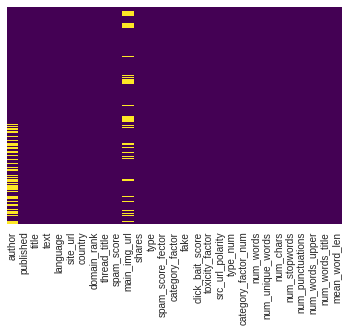

In [0]:
# to check missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
df.text.fillna(df.title, inplace=True)

In [0]:
#dft = df.loc[:, ['domain_rank', 'shares', 'type']]
#print(dft.shape)

# clean text 
df['text'] = df['text'].apply(lambda x: CleaningText(x))


lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6
lin1
lin2
lin3
lin4
lin5
lin6


In [0]:
df.columns

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'country', 'domain_rank', 'thread_title', 'spam_score', 'main_img_url',
       'shares', 'type', 'spam_score_fector', 'category_factor', 'fake',
       'click_bait_score', 'toxicity_factor', 'src_url_polarity', 'type_num',
       'category_factor_num', 'num_words', 'num_unique_words', 'num_chars',
       'num_stopwords', 'num_punctuations', 'num_words_upper',
       'num_words_title', 'mean_word_len'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()
df['type_num']= lb_encode.fit_transform(df['type'])
df['category_factor_num'] = lb_encode.fit_transform(df['category_factor'])
df.head(40)

author           published  \
0      Barracuda Brigade 2016-01-26 00:10:00   
1   reasoning with facts 2016-01-29 00:10:00   
2      Barracuda Brigade 2016-01-31 00:10:00   
3                 Fed Up 2016-01-01 00:11:00   
4                 Fed Up 2016-01-01 00:11:00   
5      Barracuda Brigade 2016-01-02 00:11:00   
6                 Fed Up 2016-01-04 00:11:00   
7                 Fed Up 2016-01-05 00:11:00   
8                 Fed Up 2016-01-06 00:11:00   
9                 Fed Up 2016-01-07 00:11:00   
10              EdJenner 2016-01-07 00:11:00   
11                Fed Up 2016-01-09 00:11:00   
12              EdJenner 2016-01-10 00:11:00   
13                Fed Up 2016-01-10 00:11:00   
14                Fed Up 2016-01-11 00:11:00   
15              EdJenner 2016-01-12 00:11:00   
16                Fed Up 2016-01-10 00:11:00   
17              EdJenner 2016-01-12 00:11:00   
18              EdJenner 2016-01-13 00:11:00   
19              EdJenner 2016-01-13 00:11:00   
20                Fed Up 2016-01-10 00:11:00   
21              EdJenner 2016-01-14 00:11:00   
22              EdJenner 2016-01-15 00:11:00   
23              EdJenner 2016-01-20 00:11:00   
24              EdJenner 2016-01-20 00:11:00   
25              EdJenner 2016-01-21 00:11:00   
26              EdJenner 2016-01-22 00:11:00   
27                Fed Up 2016-01-22 00:11:00   
28              EdJenner 2016-01-23 00:11:00   
29     Barracuda Brigade 2016-01-23 00:11:00   
30     Barracuda Brigade 2016-01-23 00:11:00   
31              EdJenner 2016-01-25 00:11:00   
32              EdJenner 2016-01-25 00:11:00   
33             Anonymous 2016-01-27 00:10:00   
34             Anonymous 2016-01-29 00:10:00   
35          Shawn Helton 2016-01-29 00:10:00   
36           Mike Rivero 2016-01-02 00:11:00   
37             Anonymous 2016-01-01 00:11:00   
38          Shawn Helton 2016-01-04 00:11:00   
39             Anonymous 2016-01-04 00:11:00   

                                                title  \
0   Muslims BUSTED  They Stole Millions In Gov   t...   
1   Re  Why Did Attorney General Loretta Lynch Ple...   
2   BREAKING  Weiner Cooperating With FBI On Hilla...   
3   PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4   FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   
5   Hillary Goes Absolutely Berserk On Protester A...   
6   BREAKING! NYPD Ready To Make Arrests In Weiner...   
7   WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...   
8   BREAKING  CLINTON CLEARED   Was This A Coordin...   
9   EVIL HILLARY SUPPORTERS Yell  F ck Trump    Bu...   
10  YIKES! HILLARY GOES OFF THE RAILS   Pulls A Ho...   
11  SAY GOODBYE! These 23 Hollywood Celebs Threate...   
12  NOT KIDDING  Colleges Give Students    Safe Sp...   
13  BOOM! MATH SHOWS Trump Would Have Beaten Obama...   
14  BOOM! This Is How President Reagan Handled Pro...   
15  TRUMP SUPPORTER GOT NUTS On MSNBC Reporter Cov...   
16  TOMI LAHREN Has Special Message For Celebritie...   
17   BoycottComedian   ROBERT DENIRO Wanted    To ...   
18  HE   S NEVER SOLD AN ORIGINAL PAINTING UNTIL N...   
19  SORRY LIBERALS   You Can Stop With The Petitio...   
20  MARK CUBAN   In The Event Donald Wins, I Have ...   
21  TRUMP SUPPORTER Whose Brutal Beating By Black ...   
22  WOW! WHITE Liberals Suggest Blacks Are Too Stu...   
23  LOL! BRITISH WIFE Of LIB ACTOR Who Said     Th...   
24  EPIC! TUCKER CARLSON Demolishes NYC Councilman...   
25  FUNNY! SNL   S SOLUTION To Democrat Election D...   
26  DONALD TRUMP Calls Meeting With Press   Dresse...   
27  OOPS! CRYBABY HAMILTON STARS Who Lectured Penc...   
28  WHITE TRUMP BASHING LIB Reprimanded On LIVE CN...   
29    BOOM! Kellyanne Conway Shuts Down CNN   s Cuomo   
30  SHARIA IN AMERICA? How Minneapolis Muslims Are...   
31  SHERIFF CLARKE On Obama   s Final Days     Oba...   
32  ANTI TRUMP CROWD CHANTS     What   s Better Th...   
33     Intl Community Still Financing, Protecting ...   
34  FBI Director Comey   s    Leaked    Memo Expla... 

# Exploratory Data Analysis (EDA)

## Let's check correlations in factors to determine multiplier factor.

In [0]:
#To show heatmap data should be in matrix form.
tc = df.corr()   #shows corelation in matrix form
tc

domain_rank  spam_score    shares      type  \
domain_rank             1.000000   -0.064499 -0.021036 -0.268180   
spam_score             -0.064499    1.000000  0.006160  0.146505   
shares                 -0.021036    0.006160  1.000000  0.140336   
type                   -0.268180    0.146505  0.140336  1.000000   
spam_score_fector       0.120638   -0.103657  0.005170 -0.529802   
fake                   -0.249853    0.172495  0.049625  0.890391   
click_bait_score        0.028270    0.029198 -0.015401 -0.025893   
toxicity_factor         0.020804    0.013056 -0.019980 -0.035969   
src_url_polarity        0.015003   -0.076795 -0.006106 -0.438729   
type_num               -0.268180    0.146505  0.140336  1.000000   
category_factor_num     0.065231   -0.050009  0.048753  0.002866   
num_words               0.183999   -0.159858 -0.017157 -0.787279   
num_unique_words        0.063319   -0.102811 -0.053410 -0.502622   
num_chars               0.181737   -0.158381 -0.017393 -0.783152   
num_stopwords           0.034178   -0.091116 -0.054430 -0.431049   
num_punctuations        0.105316   -0.149875 -0.005066 -0.705654   
num_words_upper         0.154108   -0.048809 -0.062539 -0.353742   
num_words_title         0.048903   -0.080041 -0.059988 -0.415965   
mean_word_len          -0.033281    0.046405 -0.033296  0.177522   

                     spam_score_fector      fake  click_bait_score  \
domain_rank                   0.120638 -0.249853          0.028270   
spam_score                   -0.103657  0.172495          0.029198   
shares                        0.005170  0.049625         -0.015401   
type                         -0.529802  0.890391         -0.025893   
spam_score_fector             1.000000 -0.601430         -0.013430   
fake                         -0.601430  1.000000         -0.014454   
click_bait_score             -0.013430 -0.014454          1.000000   
toxicity_factor               0.035180 -0.032277          0.007334   
src_url_polarity              0.280550 -0.403667          0.012558   
type_num                     -0.529802  0.890391         -0.025893   
category_factor_num           0.029599 -0.021775         -0.010741   
num_words                     0.610065 -0.890076          0.018387   
num_unique_words              0.447164 -0.529548          0.008087   
num_chars                     0.606347 -0.886968          0.018143   
num_stopwords                 0.396657 -0.450835          0.003013   
num_punctuations              0.608088 -0.800989          0.013431   
num_words_upper               0.265685 -0.369612          0.012469   
num_words_title               0.351569 -0.421280         -0.002013   
mean_word_len                -0.178583  0.231104         -0.019581   

                     toxicity_factor  src_url_polarity  type_num  \
domain_rank                 0.020804          0.015003 -0.268180   
spam_score                  0.013056         -0.076795  0.146505   
shares                     -0.019980         -0.006106  0.140336   
type                       -0.035969         -0.438729  1.000000   
spam_score_fector           0.035180          0.280550 -0.529802   
fake                       -0.032277         -0.403667  0.890391   
click_bait_score            0.007334          0.012558 -0.025893   
toxicity_factor             1.000000          0.027723 -0.035969   
src_url_polarity            0.027723          1.000000 -0.438729   
type_num                   -0.035969         -0.438729  1.000000   
category_factor_num         0.006295         -0.002759  0.002866   
num_words                   0.032828          0.444289 -0.787279   
num_unique_words            0.018330          0.221435 -0.502622   
num_chars                   0.033378          0.440589 -0.783152   
num_stopwords               0.013541          0.185374 -0.431049   
num_punctuations            0.033838          0.409223 -0.705654   
num_words_upper            -0.004005          0.144563 -0.353742   
num_words_title             0.01571

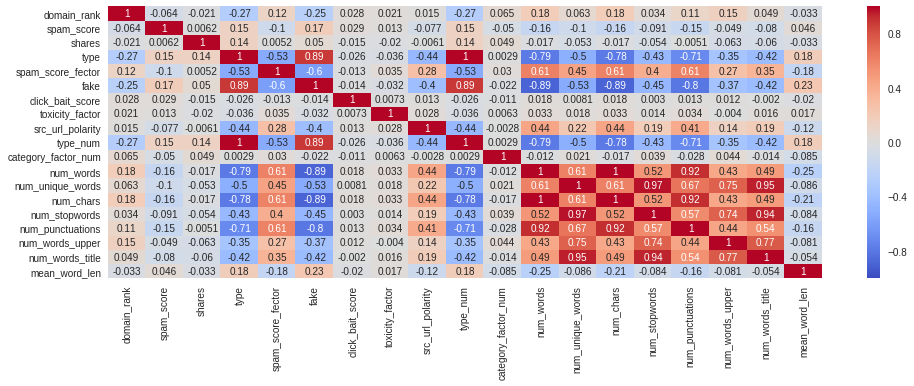

In [0]:
plt.figure(figsize = (16,5))
sns.heatmap(tc, annot=True, cmap='coolwarm')

## Pair Plot

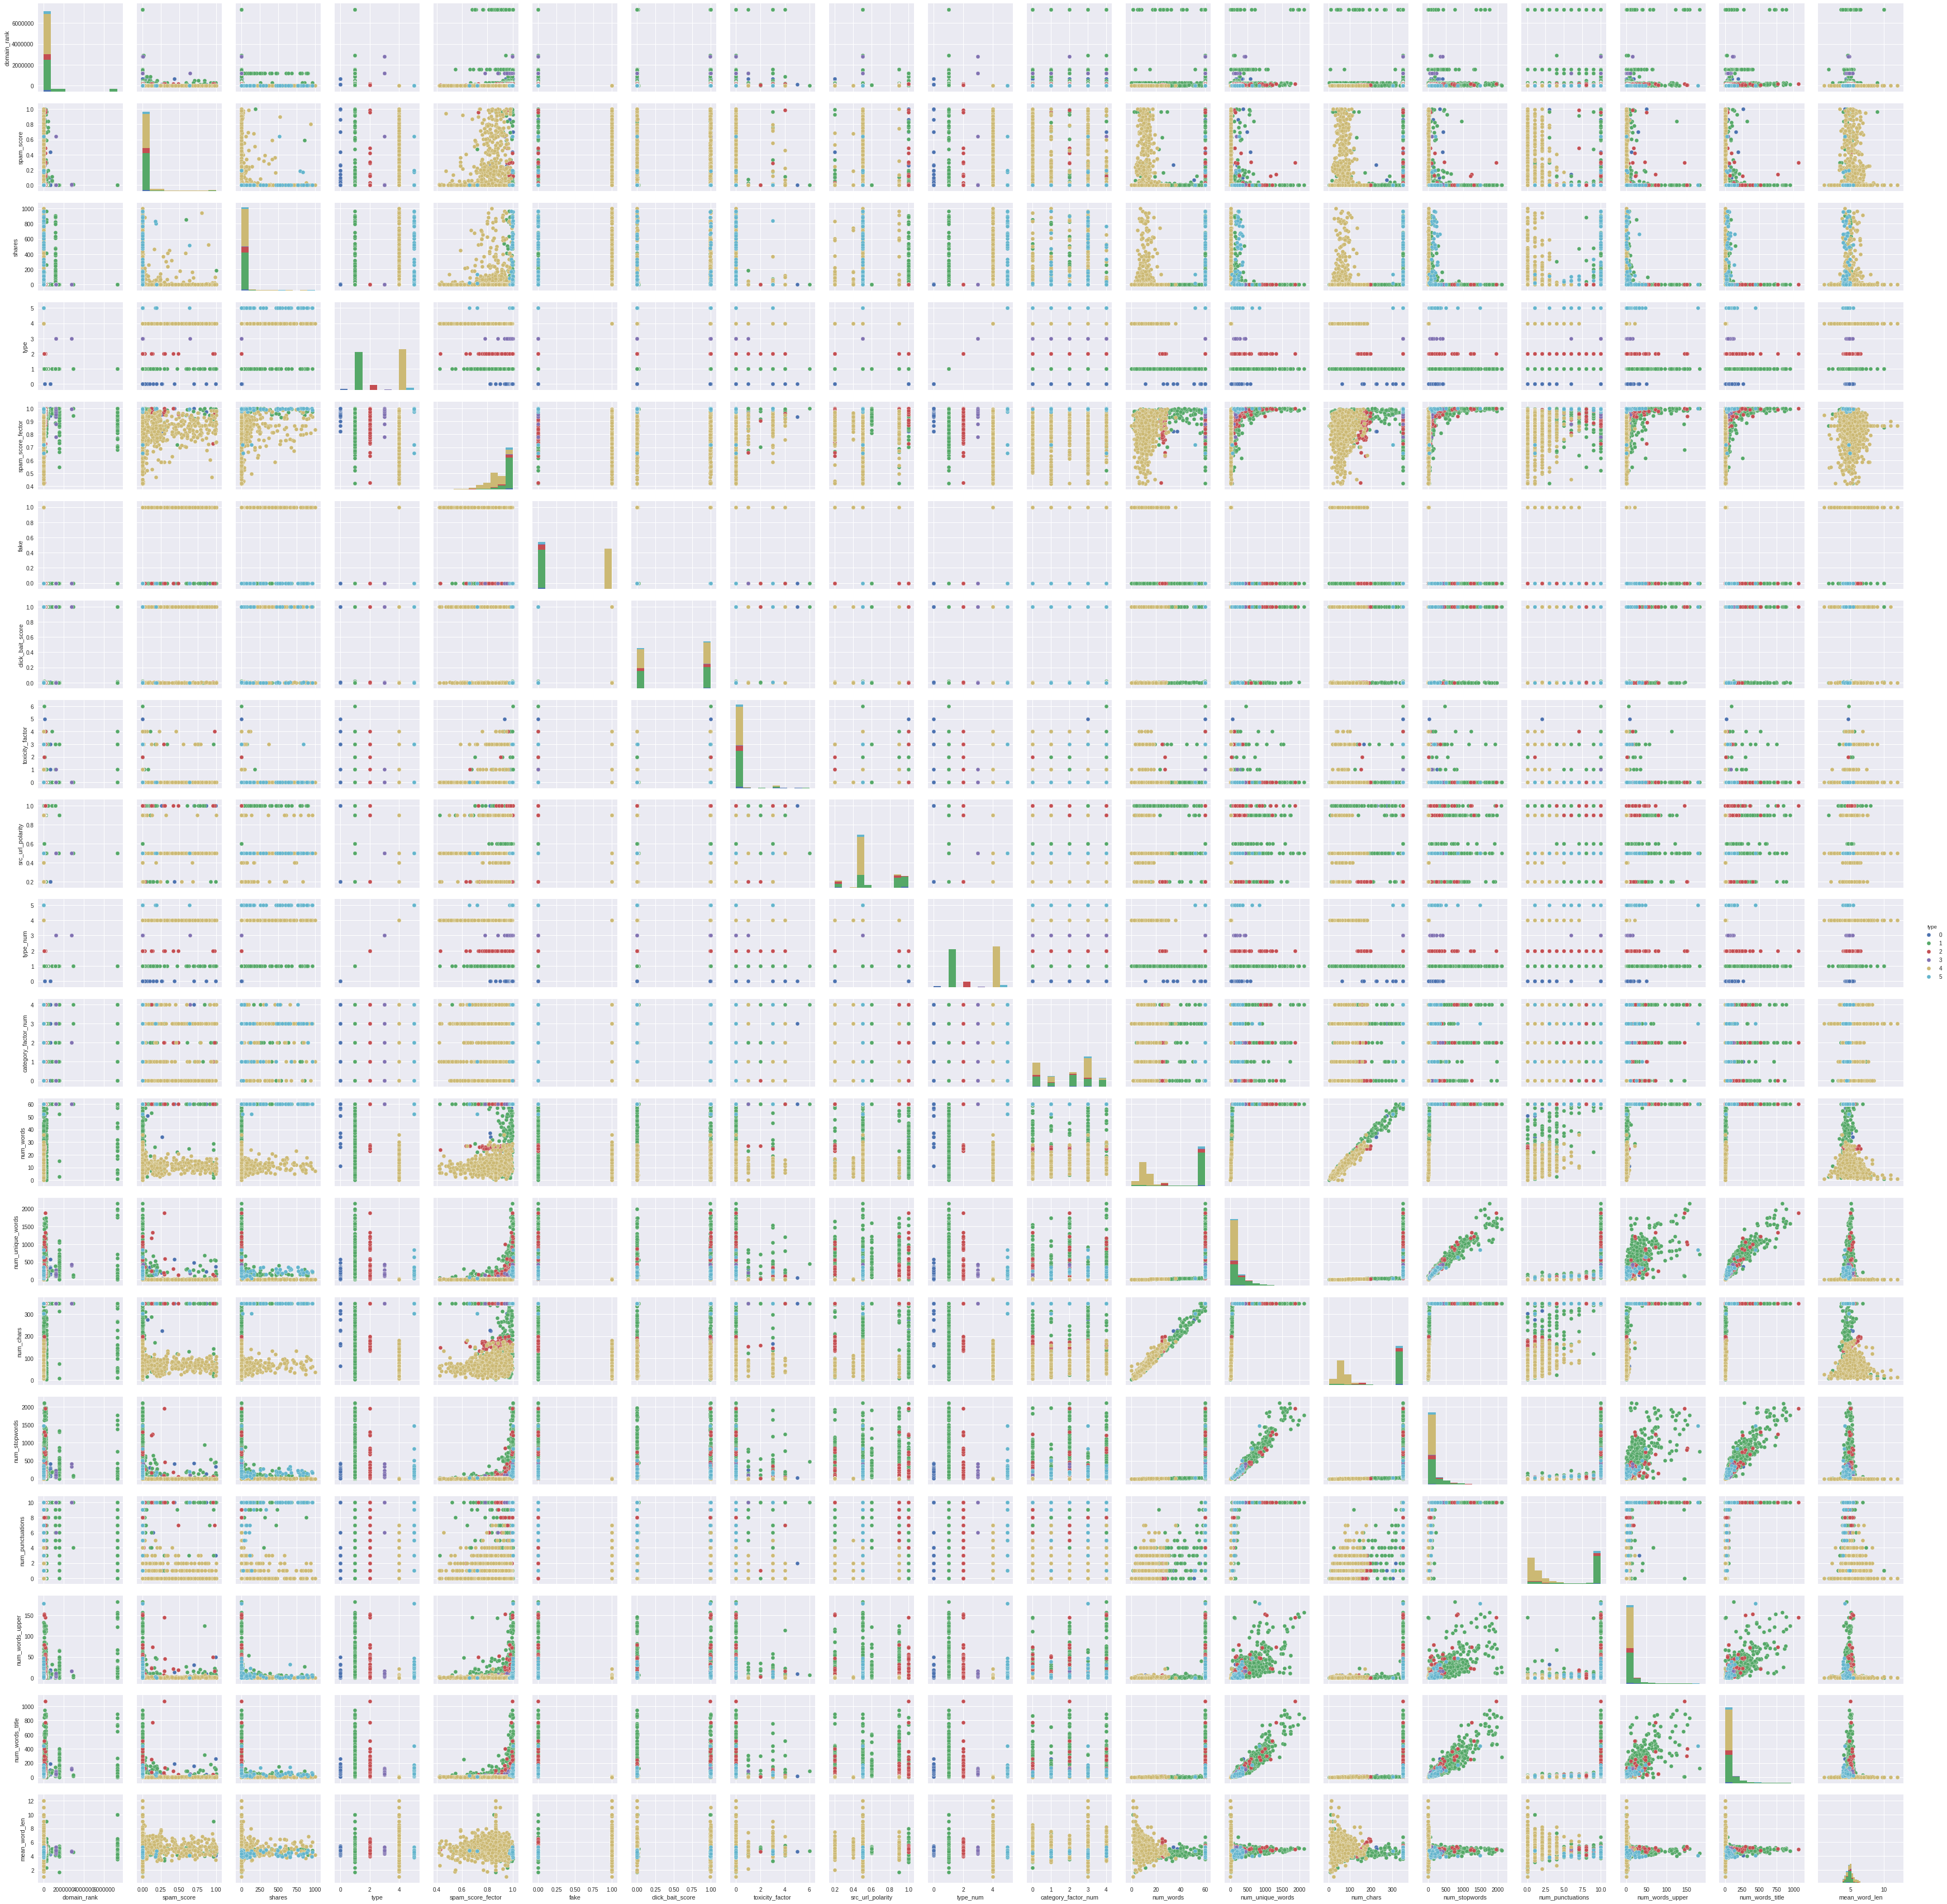

In [0]:
# to see pattern
sns.pairplot(data=df, hue="type")

## Target Distribution
First let us look at the distribution of the target variable to understand more about the imbalance and so on.

In [0]:
#plotly fix
configure_plotly_browser_state()

## target count ##
cnt_srs = df['type'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Target distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

So about 53.8% of the data is insincere news (target=1) and rest of them are sincere news.

## Word Cloud

Now let us look at the frequently occuring words in the data by creating a word cloud on the 'text' column.

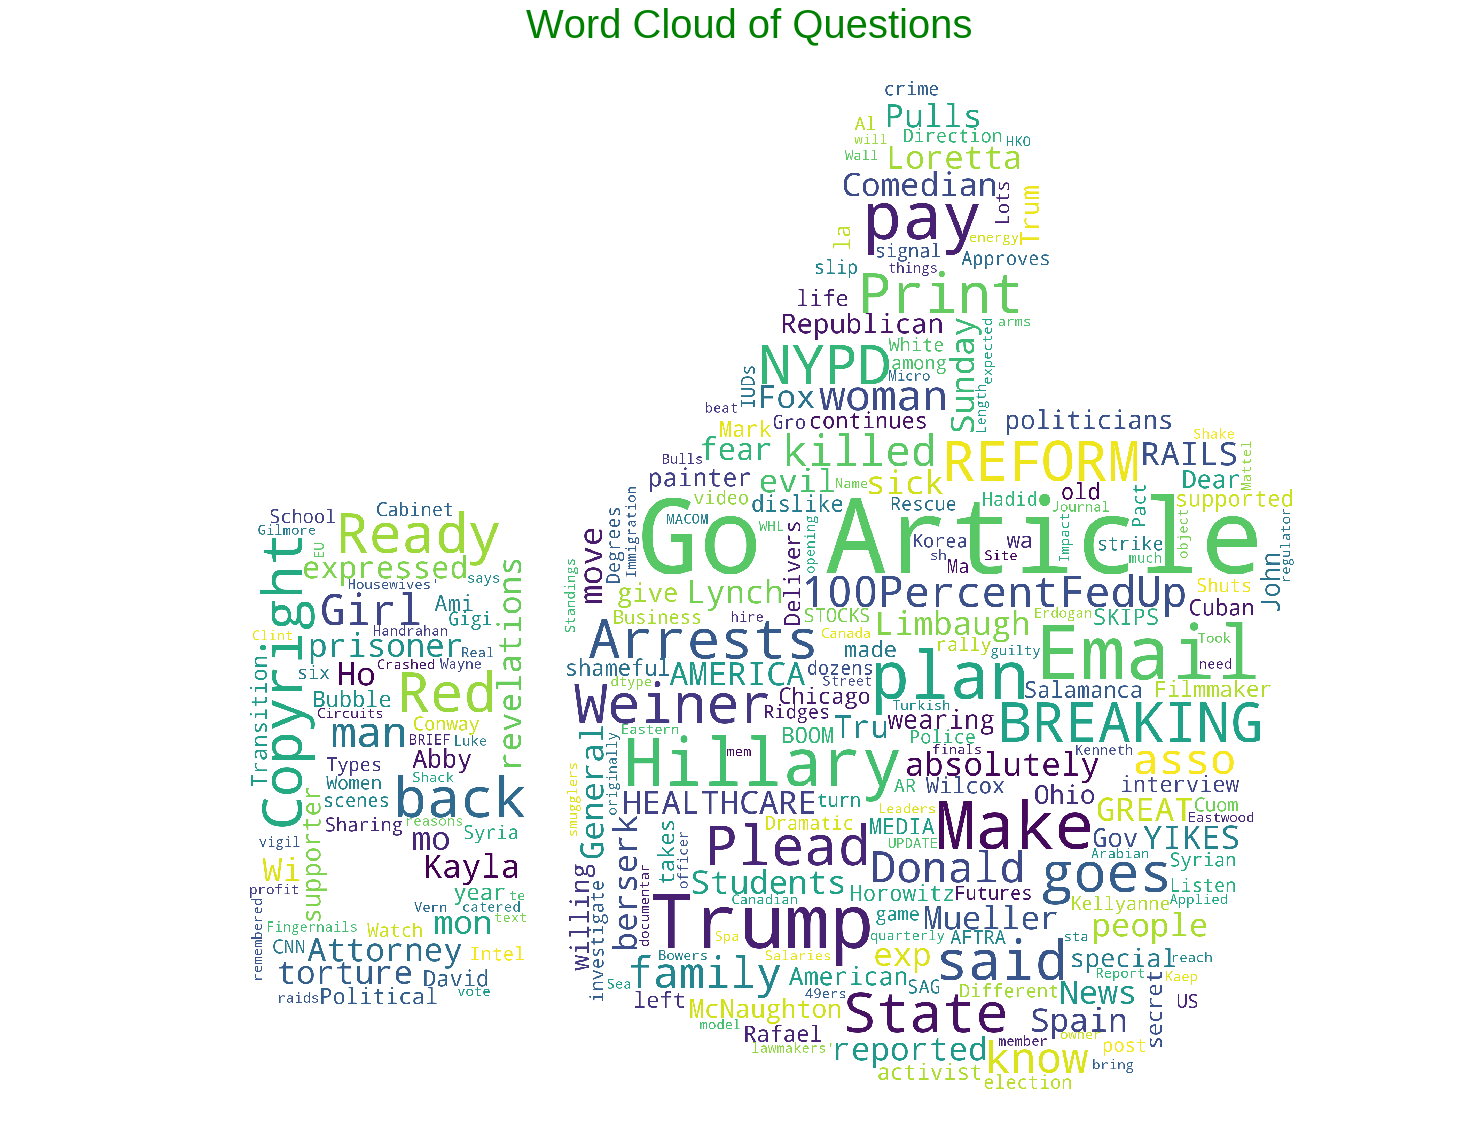

In [0]:
!pip install wordcloud
import requests
from wordcloud import WordCloud, STOPWORDS  #install $ pip install wordcloud

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

response = requests.get('https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
plot_wordcloud(df["text"], upvote_mask, max_words=300000, max_font_size=300, title="Word Cloud of Questions")

There seem to be a variety of words in there. May be it is a good idea to look at the most frequent words in each of the classes separately.

### Word Frequency plot of sincere & insincere questions:

In [0]:
from collections import defaultdict
df_real = df[df["type"]=='news']
df_fake = df[df["type"]!='news']

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

TypeError: ignored

In [0]:
# for colab plotly
configure_plotly_browser_state()

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of real news", 
                                          "Frequent words of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

#plt.figure(figsize=(10,16))
#sns.barplot(x="ngram_count", y="ngram", data=fd_sorted.loc[:50,:], color="b")
#plt.title("Frequent words for Insincere Questions", fontsize=16)
#plt.show()

**Observations:**

* Some of the top words are common across both the classes like 'trump', 'elect', 'obama' etc
* The other top words in real news after excluding the common ones at the very top are 'open', 'question' etc
* The other top words in insincere questions after excluding the common ones are 'trump', 'men', 'us' etc <br>

**Now let us also create bigram frequency plots for both the classes separately to get more idea.**

In [0]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of real news", 
                                          "Frequent bigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

**Observations:**

* We can see fake news are targating specific people, country, race or age.

**Now let's usl look at the trigram plots as well.**

In [0]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of real news", 
                                          "Frequent trigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

**Observations:**

We can see fake news are targating specific people, Country, race or age.

## Meta Features:

Now let us create some meta features and then look at how they are distributed between the classes. The ones that we will create are

1. Number of words in the text
2. Number of unique words in the text
3. Number of characters in the text
4. Number of stopwords
5. Number of punctuations
6. Number of upper case words
7. Number of title case words
8. Average length of the words

In [0]:
## Number of words in the text ##
df["num_words"] = df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df["num_unique_words"] = df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df["num_chars"] = df["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df["num_stopwords"] = df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
df["num_punctuations"] =df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df["num_words_upper"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df["num_words_title"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df["mean_word_len"] = df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

**Now let us see how these meta features are distributed between both fake and real news.**

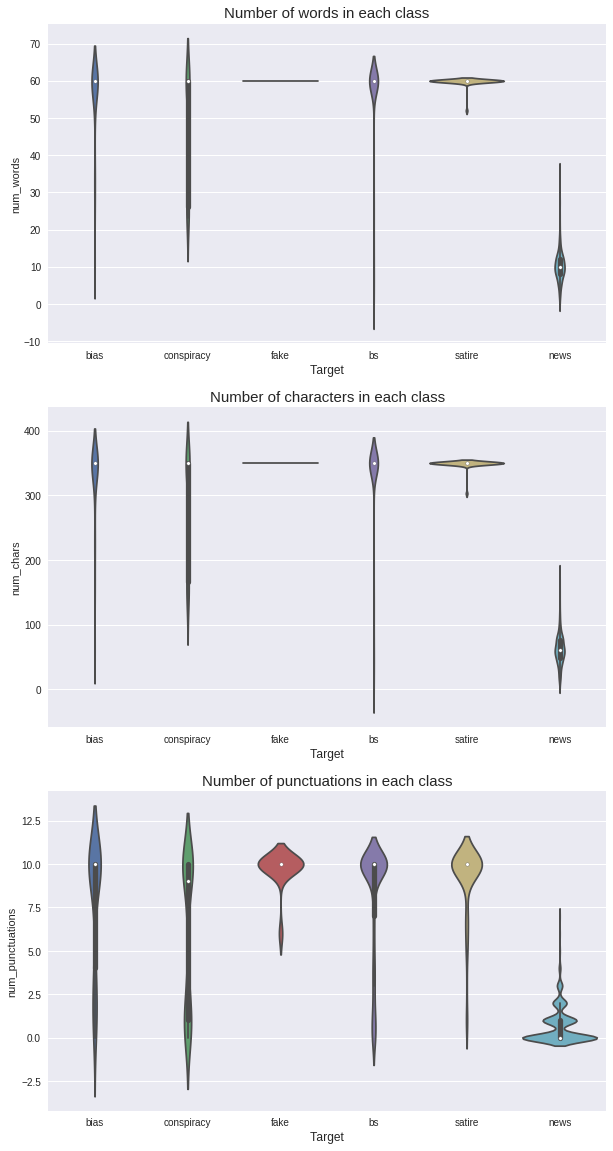

In [0]:
## Truncate some extreme values for better visuals ##
df['num_words'].loc[df['num_words']>60] = 60 #truncation for better visuals
df['num_punctuations'].loc[df['num_punctuations']>10] = 10 #truncation for better visuals
df['num_chars'].loc[df['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.violinplot(x='type', y='num_words', data=df, ax=axes[0])
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.violinplot(x='type', y='num_chars', data=df, ax=axes[1])
axes[1].set_xlabel('Target', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.violinplot(x='type', y='num_punctuations', data=df, ax=axes[2])
axes[2].set_xlabel('Target', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

**Inference:**

We can see that the insincere questions have more number of words as well as characters compared to sincere questions. So this might be a useful feature in our model.

## Visualizing Word Vectors

In [0]:
import nltk
import re

from gensim.models import word2vec
from sklearn.manifold import TSNE

In [0]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in df["text"].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

In [0]:
corpus = build_corpus(data)        
corpus[0:2]

[['print',
  'pay',
  'back',
  'money',
  'plu',
  'interest',
  'entir',
  'famili',
  'everyon',
  'came',
  'need',
  'deport',
  'asap',
  'take',
  'two',
  'year',
  'bust',
  'go',
  'anoth',
  'group',
  'steal',
  'govern',
  'taxpay',
  'group',
  'somali',
  'stole',
  'four',
  'million',
  'govern',
  'benefit',
  'month',
  'report',
  'numer',
  'case',
  'like',
  'one',
  'muslim',
  'refuge',
  'immigr',
  'commit',
  'fraud',
  'scam',
  'system',
  'way',
  'control',
  'relat'],
 ['attorney',
  'gener',
  'loretta',
  'lynch',
  'plead',
  'fifth',
  'barracuda',
  'brigad',
  'print',
  'administr',
  'block',
  'congression',
  'probe',
  'cash',
  'payment',
  'iran',
  'cours',
  'need',
  'plead',
  'th',
  'either',
  'recal',
  'refus',
  'answer',
  'plain',
  'deflect',
  'question',
  'straight',
  'corrupt',
  'finest',
  'percentfedup',
  'com',
  'talk',
  'cover',
  'ass',
  'loretta',
  'lynch',
  'plead',
  'fifth',
  'avoid',
  'incrimin',
  'paym

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

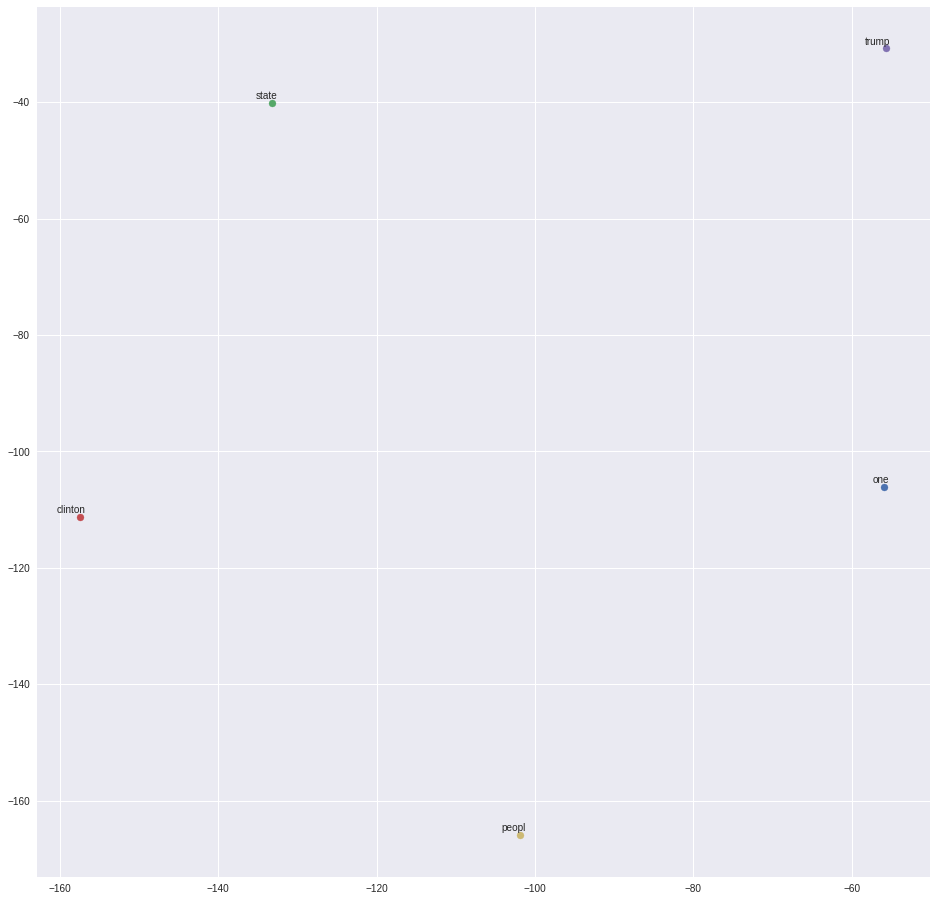

In [0]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=3000, workers=4)
tsne_plot(model)

In [0]:
model.most_similar('trump')

[('one', 0.31711626052856445),
 ('peopl', 0.26398390531539917),
 ('clinton', 0.09311625361442566),
 ('state', 0.09264377504587173)]

## Encoding and Train Test Split 

In [0]:
# LabelEncoder - Encoding categorical data to number, OneHotEncoder - row to column 
# only used for Type column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df['type'] = labelencoder.fit_transform(df[['type']])
#df = df.apply(labelencoder.fit_transform) # multicolumn encoding
#onehotencoder = OneHotEncoder(categorical_features = [0])
#y = onehotencoder.fit_transform(y).toarray()
df.head()

author           published  \
0     Barracuda Brigade 2016-01-26 00:10:00   
1  reasoning with facts 2016-01-29 00:10:00   
2     Barracuda Brigade 2016-01-31 00:10:00   
3                Fed Up 2016-01-01 00:11:00   
4                Fed Up 2016-01-01 00:11:00   

                                               title  \
0  Muslims BUSTED  They Stole Millions In Gov   t...   
1  Re  Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING  Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text language  \
0  print pay back money plu interest entir famili...  english   
1  attorney gener loretta lynch plead fifth barra...  english   
2  red state fox news sunday report morn anthoni ...  english   
3  email kayla mueller prison tortur isi chanc re...  english   
4  email healthcar reform make america great sinc...  english   

              site_url country  domain_rank  \
0  100percentfedup.com      US        88465   
1  100percentfedup.com      US        88465   
2  100percentfedup.com      US        88465   
3  100percentfedup.com      US        88465   
4  100percentfedup.com      US        88465   

                                        thread_title  spam_score  \
0  Muslims BUSTED: They Stole Millions In Gov‚Äôt...       0.000   
1  Re: Why Did Attorney General Loretta Lynch Ple...       0.000   
2  BREAKING: Weiner Cooperating With FBI On Hilla...       0.000   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...       0.068   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...       0.865   

                                        main_img_url  shares  type  \
0  http://bb4sp.com/wp-content/uploads/2016/10/Fu...       0     0   
1  http://bb4sp.com/wp-content/uploads/2016/10/Fu...       0     0   
2  http://bb4sp.com/wp-content/uploads/2016/10/Fu...       0     0   
3  http://100percentfedup.com/wp-content/uploads/...       0     0   
4  http://100percentfedup.com/wp-content/uploads/...       0     0   

   spam_score_fector category_factor  fake  click_bait_score  toxicity_factor  \
0           0.993337        business     0          0.999951                0   
1           0.824470        business     0          0.997981                0   
2           0.998415        business     0          0.001113                0   
3           0.982233           sport     0          0.001539                0   
4           0.976653        business     0          0.998544                0   

   src_url_polarity  type_num  category_factor_num  num_words  \
0               1.0         0                    0         60   
1               1.0         0                    0         60   
2               1.0         0                    0         60   
3               1.0         0                    3         51   
4               1.0         0                    0         60   

   num_unique_words  num_chars  num_stopwords  num_punctuations  \
0                80        350             42                 4   
1               186        350            113                10   
2               161        350             97                10   
3                45        275             19                 1   
4               223        350            132                10   

   num_words_upper  num_words_title  mean_word_len  
0                1               12       4.505495  
1                2               67       5.047945  
2                2               31       4.694915  
3                2               10       4.274510  
4                9               42       5.163690

In [0]:


X = df[['domain_rank', 'shares','spam_score','spam_score_fector','type_num','category_factor_num','click_bait_score','toxicity_factor','src_url_polarity']]
#title	text	language	site_url	country	domain_rank	thread_title	spam_score	main_img_url	shares	type	spam_score_fector	category_factor	fake	click_bait_score	toxicity_factor	src_url_polarity	type_num
y = df['fake']

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 100)

## Model

### Work in progress

In [0]:
# Get the tfidf vectors #
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
tfidf_vec.fit_transform(df['text'].values.tolist())
train_tfidf = tfidf_vec.transform(df['text'].values.tolist())
#test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())
xffactor= 18.21

In [0]:
df.shape[0]

3711

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[481,  29],
       [  0, 418]])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97       510
          1       0.94      1.00      0.97       418

avg / total       0.97      0.97      0.97       928



In [0]:
classifier = DecisionTreeClassifier(criterion ='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:

classifier.feature_importances_

array([0.85022723, 0.        , 0.        , 0.        , 0.14977277,
       0.        , 0.        , 0.        , 0.        ])

In [0]:
#X = df[['domain_rank', 'shares']]
#y = df['type']
#print(X)


In [0]:
#y.unique()

In [0]:
#Validation

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[510,   0],
       [  0, 418]])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       510
          1       1.00      1.00      1.00       418

avg / total       1.00      1.00      1.00       928



In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
rfc_pred = rfc.predict(X_test)

In [0]:
rfc.feature_importances_

array([3.95278119e-01, 5.95218091e-03, 4.64484246e-03, 1.17164322e-01,
       4.08392020e-01, 1.55526713e-03, 5.09229056e-04, 4.30426171e-05,
       6.64609763e-02])

In [0]:
print(confusion_matrix(y_test,rfc_pred))

[[510   0]
 [  0 418]]


In [0]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       510
          1       1.00      1.00      1.00       418

avg / total       1.00      1.00      1.00       928



In [0]:

#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", metrics.accuracy_score(y_test,rfc_pred)*100 -)

.......

Thank You!